In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import glob

# jtplot.style('onedork',figsize=(20, 10), fscale=2)
jtplot.style('grade3',figsize=(20, 10), fscale=2)

In [24]:
reward_criterion_sub_data_file = glob.glob('/home/krista/Documents/loki_1/data/BIDS/sub-0860/ses-00/beh/*task-reward-criterion*.tsv')
perc_criterion_sub_data_file = glob.glob('/home/krista/Documents/loki_1/data/BIDS/sub-0860/ses-00/beh/*task-perc-criterion*.csv')

In [26]:
reward_criterion_sub_df = pd.read_csv(reward_criterion_sub_data_file[0],sep=r'\,|\t',engine='python')
perc_criterion_sub_df = pd.read_csv(perc_criterion_sub_data_file[0],sep=r'\,|\t',engine='python')

In [38]:
reward_criterion_sub_df = reward_criterion_sub_df.rename(columns=lambda x: x.strip())
perc_criterion_sub_df = perc_criterion_sub_df.rename(columns=lambda x: x.strip())


In [39]:
reward_criterion_sub_df.head()

,stim_onset,stim_duration,trial_type,rt,accuracy,epoch_length,epoch_trial,epoch_number
0,0.033345,1.500047,0.0,0.629101,0.0,8.0,0.0,0.0
1,2.566764,1.500041,1.0,0.415646,1.0,8.0,1.0,0.0
2,5.100190,1.500041,2.0,0.565142,1.0,8.0,2.0,0.0
3,7.633605,1.500029,3.0,0.505695,1.0,8.0,3.0,0.0
4,10.167021,1.500049,4.0,0.486157,1.0,8.0,4.0,0.0


In [40]:
perc_criterion_sub_df.head()

,trial,subj_id,LR_choice,reward,cumulative_reward,rt,total_trial_time,iti,id_choice,id_solution,id_choice_acc,cum_acc,stim_onset,stim_offset,abs_response_time
0,0.0,860.0,NaN,0.0,495.0,NaN,6.300226,1.423257,NaN,102.0,NaN,NaN,0.033344,6.333550,1.233423
1,1.0,860.0,82.0,1.0,496.0,0.653708,1.500687,1.485864,102.0,102.0,1.0,0.500000,7.816938,9.316982,8.470647
2,2.0,860.0,76.0,1.0,497.0,0.559441,1.500801,1.396105,102.0,102.0,1.0,0.666667,10.867045,12.367089,11.426486
3,3.0,860.0,76.0,0.0,497.0,0.760268,1.500595,1.037210,109.0,102.0,0.0,0.500000,13.817140,15.317191,14.577409
4,4.0,860.0,76.0,1.0,498.0,0.676131,1.500693,1.458700,102.0,102.0,1.0,0.600000,16.417230,17.917279,17.093361


In [32]:
trial_time = 1.5 

reward_trials_to_criterion = len(reward_criterion_sub_df) 
reward_time_to_criterion = (trials_to_criterion * trial_time) / 60

In [34]:
trial_time = 1.5 

perc_trials_to_criterion = len(perc_criterion_sub_df) 

In [42]:
print('mean rt: ', reward_criterion_sub_df.rt.mean(), 'std rt: ', reward_criterion_sub_df.rt.std())

mean rt:  0.5224600306343442 std rt:  0.09722256102521362


In [43]:
print('mean rt: ', perc_criterion_sub_df.rt.mean(), 'std rt: ', perc_criterion_sub_df.rt.std())

mean rt:  0.5112375421224222 std rt:  0.11911695950272909


In [50]:
print('mean acc: ', perc_criterion_sub_df.id_choice_acc.mean())

mean acc:  0.9032258064516129


In [51]:
print('mean acc: ', reward_criterion_sub_df.accuracy.mean())

mean acc:  0.7708333333333334


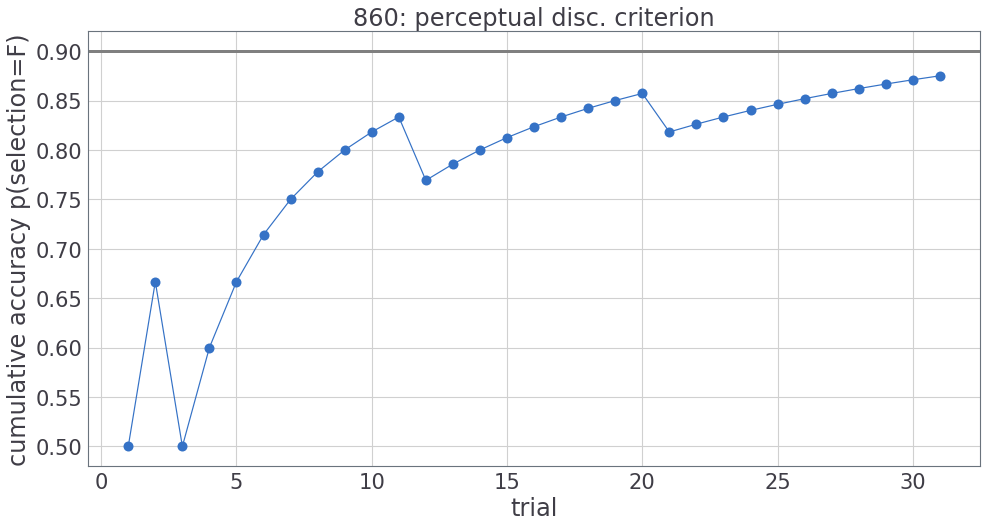

In [83]:
plt.plot(perc_criterion_sub_df.cum_acc, '.-', markersize=20)
plt.xlabel('trial')
plt.ylabel('cumulative accuracy p(selection=F)')
plt.title(str(perc_criterion_sub_df.subj_id.unique()[0].astype('int')) + ': perceptual disc. criterion')
plt.axhline(y=0.90, xmax=len(perc_criterion_sub_df), xmin=0, color='gray', linewidth=3)

In [93]:
reward_criterion_sub_df['cum_acc'] = reward_criterion_sub_df.accuracy.expanding().mean()

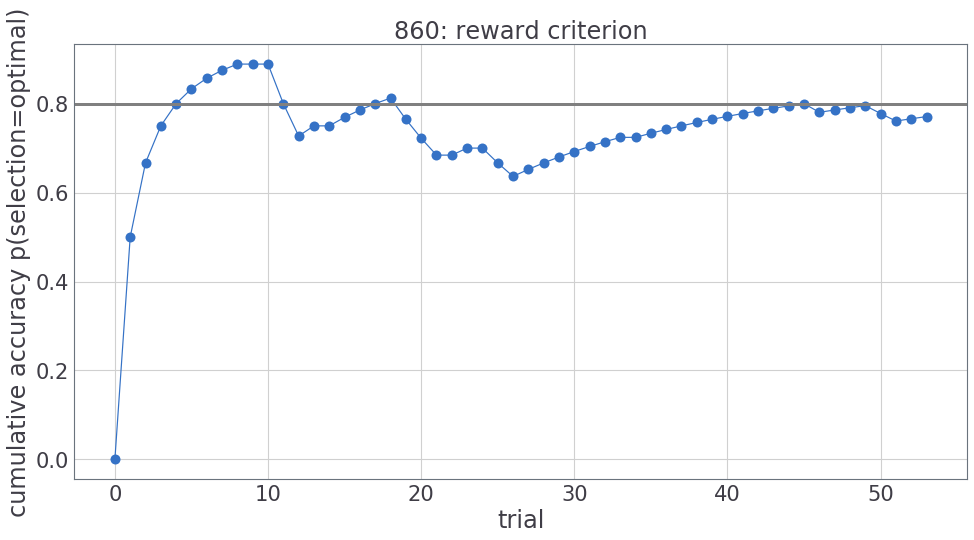

In [94]:
plt.plot(reward_criterion_sub_df.cum_acc, '.-', markersize=20)
plt.xlabel('trial')
plt.ylabel('cumulative accuracy p(selection=optimal)')
plt.title(str(perc_criterion_sub_df.subj_id.unique()[0].astype('int')) + ': reward criterion')
plt.axhline(y=0.80, xmax=len(perc_criterion_sub_df), xmin=0, color='gray', linewidth=3)

Text(0.5, 1.0, '860: reward criterion')

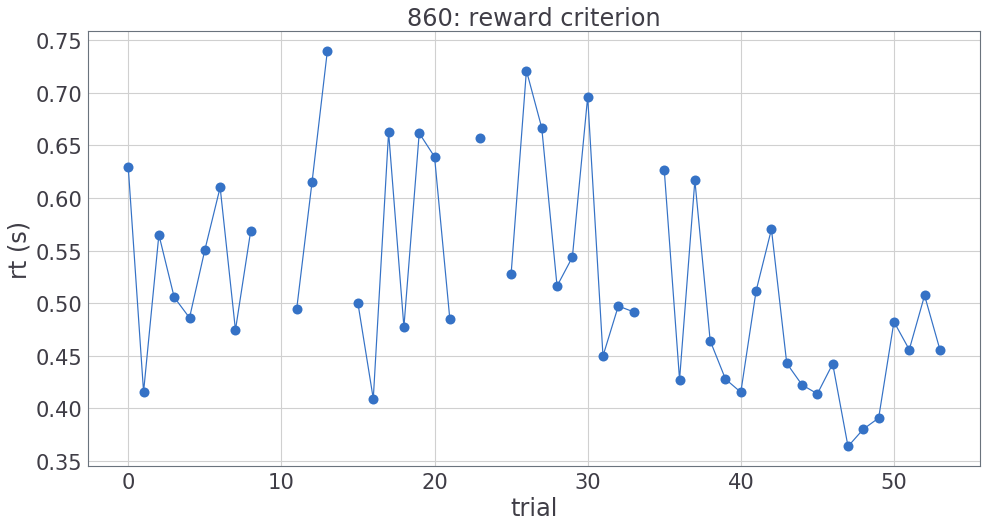

In [95]:
plt.plot(reward_criterion_sub_df.rt, '.-', markersize=20)
plt.xlabel('trial')
plt.ylabel('rt (s)')
plt.title(str(perc_criterion_sub_df.subj_id.unique()[0].astype('int')) + ': reward criterion')

Text(0.5, 1.0, '860: perceptual disc. criterion')

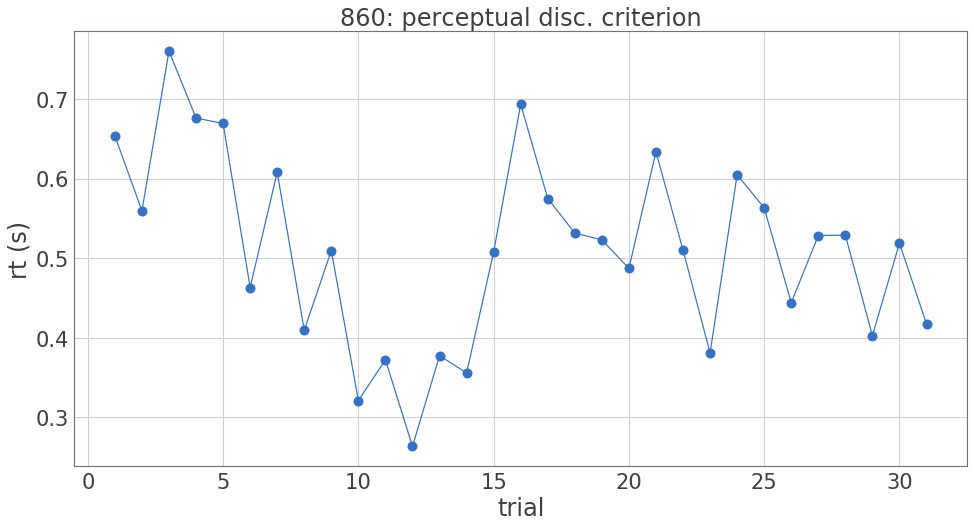

In [96]:
plt.plot(perc_criterion_sub_df.rt, '.-', markersize=20)
plt.xlabel('trial')
plt.ylabel('rt (s)')
plt.title(str(perc_criterion_sub_df.subj_id.unique()[0].astype('int')) + ': perceptual disc. criterion')